In [7]:
import pandas as pd

# Load the dataset
file_path = "Traffic_Crashes_-_Crashes.csv"  # Update with the correct path
df = pd.read_csv(file_path)

# Display basic information

df.head()


,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,...,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,crash_year,crash_season,day_night
0,00a530520c84927490b597a6220ff3f2a3347472ef3086...,2025-01-15 13:50:00,30,no controls,NO CONTROLS,clear,daylight,FIXED OBJECT,RAMP,STRAIGHT AND LEVEL,...,0.0,13,4,1,41.816073,-87.656743,POINT (-87.656742699936 41.816073475493),2025,Winter,Day
1,0173d218723a1d608d77b7142ca9b9a4afd7463e824162...,2023-09-23 10:39:00,30,traffic signal,FUNCTIONING PROPERLY,unknown,unknown,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,10,7,9,42.010386,-87.670011,POINT (-87.67001097385 42.010385766289),2023,Fall,Day
2,26205ab4bcce4f6c3751a4947c94e5ad28b0dc0738cb27...,2019-12-22 20:11:00,30,traffic signal,FUNCTIONING PROPERLY,clear,"darkness, lighted road",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,20,1,12,41.715805,-87.643208,POINT (-87.643208253244 41.715804770128),2019,Winter,Night
3,262653b489eadfd76fb48900ea9a48717357c1fdc9dbb8...,2023-07-01 14:00:00,30,traffic signal,FUNCTIONING PROPERLY,clear,daylight,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,14,7,7,41.736587,-87.625599,POINT (-87.625599334506 41.736586782204),2023,Summer,Day
4,0235f4b4460f50115c7f6cb0d2bedeea7ce92b9b0f5943...,2025-01-15 18:40:00,25,traffic signal,FUNCTIONING PROPERLY,clear,"darkness, lighted road",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,0.0,18,4,1,41.846038,-87.724761,POINT (-87.724761370522 41.846037568964),2025,Winter,Night


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911722 entries, 0 to 911721
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_record_id                911722 non-null  object 
 1   crash_date                     911722 non-null  object 
 2   posted_speed_limit             911722 non-null  int64  
 3   traffic_control_device         911722 non-null  object 
 4   device_condition               911722 non-null  object 
 5   weather_condition              911722 non-null  object 
 6   lighting_condition             911722 non-null  object 
 7   first_crash_type               911722 non-null  object 
 8   trafficway_type                911722 non-null  object 
 9   alignment                      911722 non-null  object 
 10  roadway_surface_cond           911722 non-null  object 
 11  road_defect                    911722 non-null  object 
 12  report_type                   

In [ ]:
# Drop highly missing columns
columns_to_drop = [
    'CRASH_DATE_EST_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 
    'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I'
]
df = df.drop(columns=columns_to_drop)

In [10]:
# Check for columns with missing values
missing_values = df.isnull().sum()

missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


In [65]:
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

Total duplicate rows: 0


In [19]:
columns_to_drop = ['LANE_CNT'
    
]
df = df.drop(columns=columns_to_drop)

In [22]:
columns_to_drop = ['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I']
df = df.drop(columns=columns_to_drop)

In [25]:
# Fill missing values for categorical variables
df['REPORT_TYPE'].fillna("Unknown", inplace=True)
df['STREET_NAME'].fillna("Unknown", inplace=True)
df['MOST_SEVERE_INJURY'].fillna("No Injury", inplace=True)  # "No Injury" (assuming no report means no injury).

In [27]:
# Drop rows with missing location data
df.dropna(subset=['LATITUDE', 'LONGITUDE', 'LOCATION'], inplace=True)

In [33]:
columns_to_drop = ['BEAT_OF_OCCURRENCE']
df = df.drop(columns=columns_to_drop)


In [36]:
injury_columns = [
    'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 
    'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 
    'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN'
]
df[injury_columns] = df[injury_columns].fillna(0)      #Fill with 0 (assuming missing means no injury).

In [39]:
# Fill missing 'STREET_DIRECTION' with the most common value (mode)
most_common_direction = df['STREET_DIRECTION'].mode()[0]
df['STREET_DIRECTION'].fillna(most_common_direction, inplace=True)

In [42]:
# Convert CRASH_DATE to datetime format
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')


C:\Users\91910\AppData\Local\Temp\ipykernel_15064\1597032566.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')


In [44]:
# Extract Year from CRASH_DATE
df['CRASH_YEAR'] = df['CRASH_DATE'].dt.year

In [47]:
# Create Crash Season Column
season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 
                  6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
df['CRASH_SEASON'] = df['CRASH_MONTH'].map(season_mapping)

In [56]:
# Find rows where DATE_POLICE_NOTIFIED is earlier than CRASH_DATE
invalid_dates = df[df['DATE_POLICE_NOTIFIED'] < df['CRASH_DATE']]
# Count and drop invalid rows
num_invalid_rows = len(invalid_dates)
df = df.drop(invalid_dates.index)

In [58]:
# Create Day/Night Column
df['DAY_NIGHT'] = df['CRASH_HOUR'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911722 entries, 0 to 918448
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                911722 non-null  object        
 1   CRASH_DATE                     911722 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             911722 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         911722 non-null  object        
 4   DEVICE_CONDITION               911722 non-null  object        
 5   WEATHER_CONDITION              911722 non-null  object        
 6   LIGHTING_CONDITION             911722 non-null  object        
 7   FIRST_CRASH_TYPE               911722 non-null  object        
 8   TRAFFICWAY_TYPE                911722 non-null  object        
 9   ALIGNMENT                      911722 non-null  object        
 10  ROADWAY_SURFACE_COND           911722 non-null  object        
 11  ROAD_

In [63]:
# Standardize Column Names
df.columns = [col.lower().replace(' ', '_') for col in df.columns]


In [67]:
# Standardize Categorical Values
df['weather_condition'] = df['weather_condition'].str.strip().str.lower()
df['traffic_control_device'] = df['traffic_control_device'].str.strip().str.lower()
df['lighting_condition'] = df['lighting_condition'].str.strip().str.lower()
df['street_name'] = df['street_name'].str.strip().str.lower()

In [68]:
#Standardization for Key Columns

#Standardize Weather Condition Column
df['weather_condition'] = df['weather_condition'].replace({
    'cloudy/overcast': 'cloudy',
    'fog/smoke/haze': 'fog',
    'freezing rain/drizzle': 'freezing_rain',
    'sleet/hail': 'sleet',
    'blowing snow': 'snow',
    'severe cross wind gate': 'windy',
    'blowing sand, soil, dirt': 'dust_storm'
})

#Standardize Street Names (Expand Abbreviations)
df['street_name'] = df['street_name'].replace({
    'ave': 'avenue',
    'st': 'street',
    'rd': 'road',
    'blvd': 'boulevard',
    'dr': 'drive',
    'pl': 'place',
    'ln': 'lane',
    'hwy': 'highway',
    'pkwy': 'parkway',
    'ctr': 'center'
})

#Standardize Traffic Control Device Types
df['traffic_control_device'] = df['traffic_control_device'].replace({
    'stop sign/flasher': 'stop_sign',
    'other reg. sign': 'other_regulatory_sign',
    'railroad crossing gate': 'railroad_gate',
    'rr crossing sign': 'railroad_sign',
    'flashing control signal': 'flashing_signal',
    'pedestrian crossing sign': 'pedestrian_sign',
    'school zone': 'school_zone',
    'other warning sign': 'warning_sign',
    'no passing': 'no_passing_zone'
})

# Verify the standardization
print(df['weather_condition'].unique())
print(df['street_name'].unique())
print(df['traffic_control_device'].unique())


['clear' 'unknown' 'rain' 'cloudy' 'snow' 'freezing_rain' 'other' 'sleet'
 'fog' 'dust_storm' 'windy']
['43rd st' 'greenleaf ave' 'halsted st' ... 'commons dr' 'crestline st'
 'park pl']
['no controls' 'traffic signal' 'unknown' 'stop_sign' 'other' 'yield'
 'other_regulatory_sign' 'police/flagman' 'railroad_gate' 'school_zone'
 'other railroad crossing' 'warning_sign' 'railroad_sign'
 'flashing_signal' 'pedestrian_sign' 'delineators' 'lane use marking'
 'no_passing_zone' 'bicycle crossing sign']


In [69]:
# Save dataset with new columns
df.to_csv(" clean_chicago_traffic.csv", index=False)

In [70]:
df.head()

,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,...,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,crash_year,crash_season,day_night
0,00a530520c84927490b597a6220ff3f2a3347472ef3086...,2025-01-15 13:50:00,30,no controls,NO CONTROLS,clear,daylight,FIXED OBJECT,RAMP,STRAIGHT AND LEVEL,...,0.0,13,4,1,41.816073,-87.656743,POINT (-87.656742699936 41.816073475493),2025,Winter,Day
2,0173d218723a1d608d77b7142ca9b9a4afd7463e824162...,2023-09-23 10:39:00,30,traffic signal,FUNCTIONING PROPERLY,unknown,unknown,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,10,7,9,42.010386,-87.670011,POINT (-87.67001097385 42.010385766289),2023,Fall,Day
3,26205ab4bcce4f6c3751a4947c94e5ad28b0dc0738cb27...,2019-12-22 20:11:00,30,traffic signal,FUNCTIONING PROPERLY,clear,"darkness, lighted road",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,20,1,12,41.715805,-87.643208,POINT (-87.643208253244 41.715804770128),2019,Winter,Night
4,262653b489eadfd76fb48900ea9a48717357c1fdc9dbb8...,2023-07-01 14:00:00,30,traffic signal,FUNCTIONING PROPERLY,clear,daylight,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,14,7,7,41.736587,-87.625599,POINT (-87.625599334506 41.736586782204),2023,Summer,Day
5,0235f4b4460f50115c7f6cb0d2bedeea7ce92b9b0f5943...,2025-01-15 18:40:00,25,traffic signal,FUNCTIONING PROPERLY,clear,"darkness, lighted road",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,0.0,18,4,1,41.846038,-87.724761,POINT (-87.724761370522 41.846037568964),2025,Winter,Night


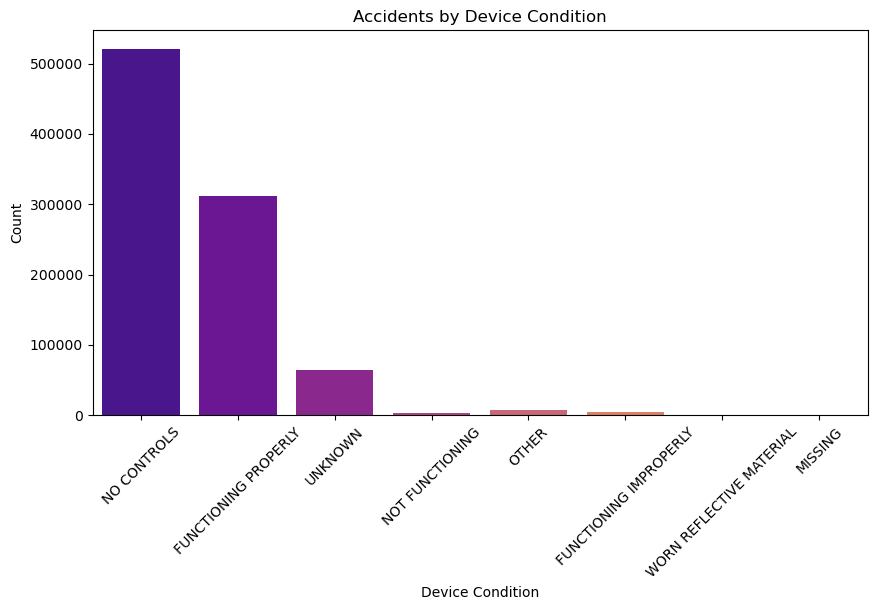

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#1
plt.figure(figsize=(10,5))
sns.countplot(x=df['device_condition'], palette='plasma')
plt.title("Accidents by Device Condition")
plt.xlabel("Device Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


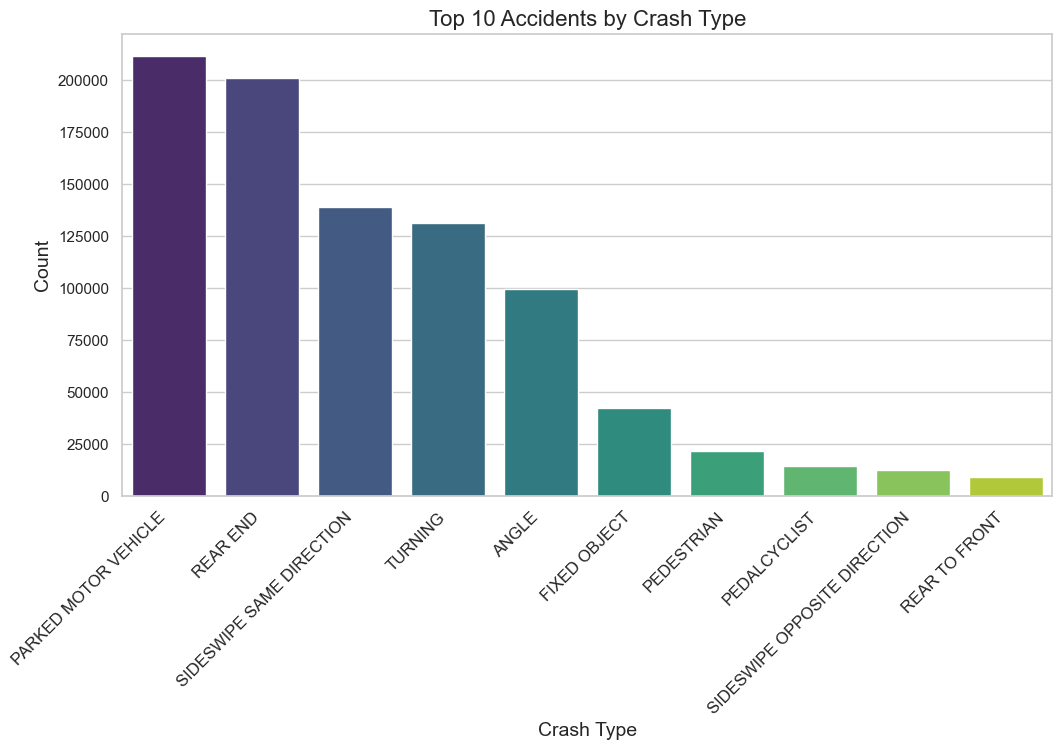

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
#2
# Get the top 10 crash types
top_10_crash_types = df['first_crash_type'].value_counts().nlargest(10)

# Plot the top 10 crash types
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_crash_types.index, y=top_10_crash_types.values, palette='viridis')

# Improve visibility
plt.title("Top 10 Accidents by Crash Type", fontsize=16)
plt.xlabel("Crash Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.show()


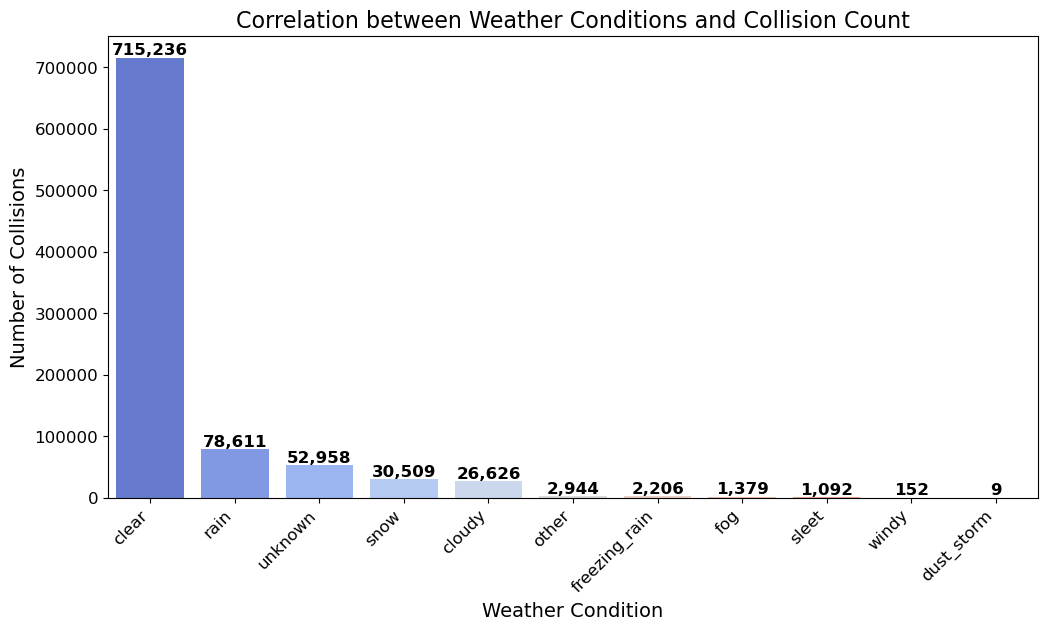

In [31]:
#3
# Count collisions per weather condition
weather_crash_counts = df['weather_condition'].value_counts()

# Plot correlation between weather conditions and collision count
plt.figure(figsize=(12, 6))
sns.barplot(x=weather_crash_counts.index, y=weather_crash_counts.values, palette='coolwarm')

# Add labels on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', 
                        (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Customize the plot
plt.title("Correlation between Weather Conditions and Collision Count", fontsize=16)
plt.xlabel("Weather Condition", fontsize=14)
plt.ylabel("Number of Collisions", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


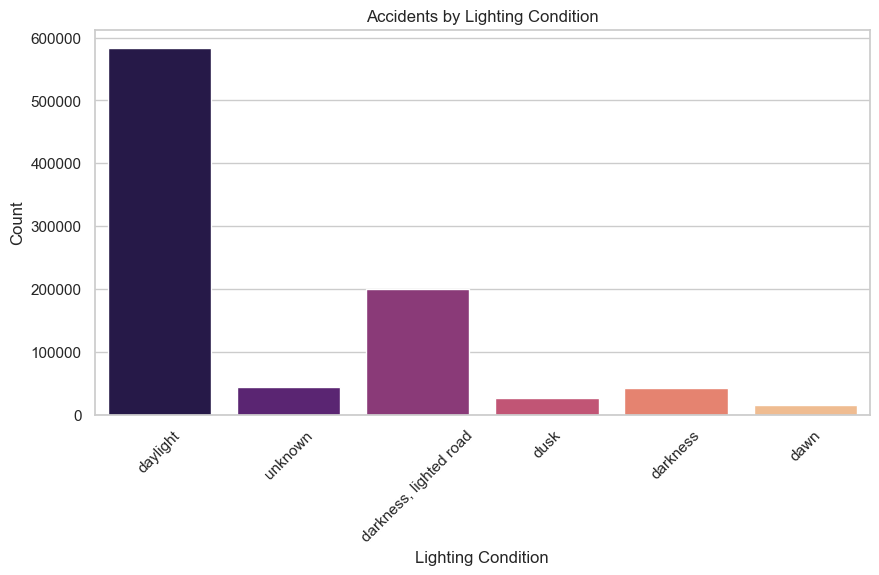

In [78]:
#4
plt.figure(figsize=(10,5))
sns.countplot(x=df['lighting_condition'], palette='magma')
plt.title("Accidents by Lighting Condition")
plt.xlabel("Lighting Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


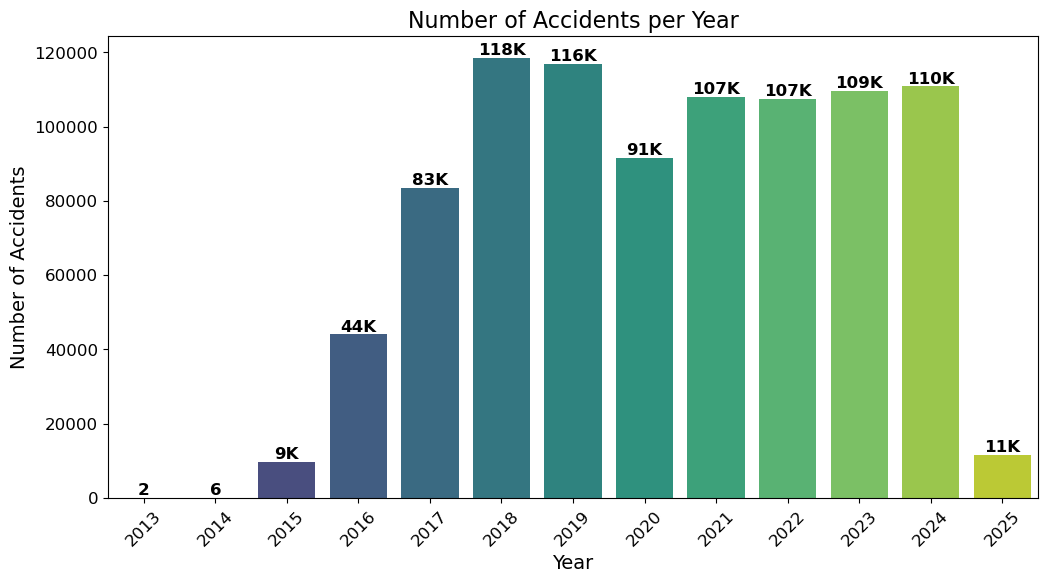

In [15]:
#5
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='crash_year', data=df, palette='viridis')

# Function to format numbers in 'K' format
def format_k(value):
    if value >= 1000:
        return f'{value//1000}K'
    return str(value)

# Add labels on top of each bar in 'K' format
for p in ax.patches:
    ax.annotate(format_k(int(p.get_height())),  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Add title and labels
plt.title('Number of Accidents per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


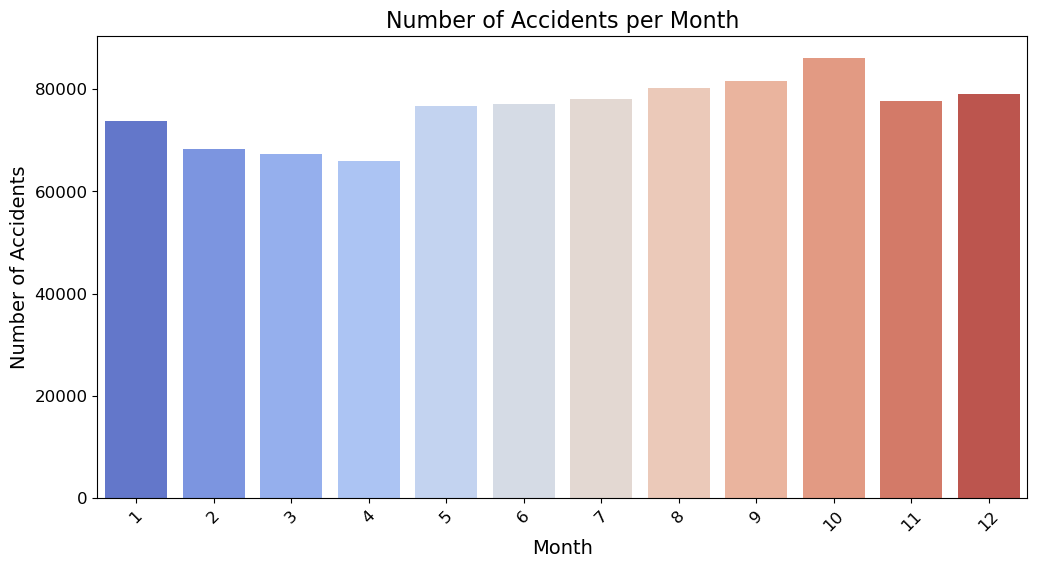

In [17]:
#6
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Create countplot with a custom color palette
ax = sns.countplot(x='crash_month', data=df, palette='coolwarm')  # Change 'coolwarm' to any other palette

# Add title and labels
plt.title('Number of Accidents per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


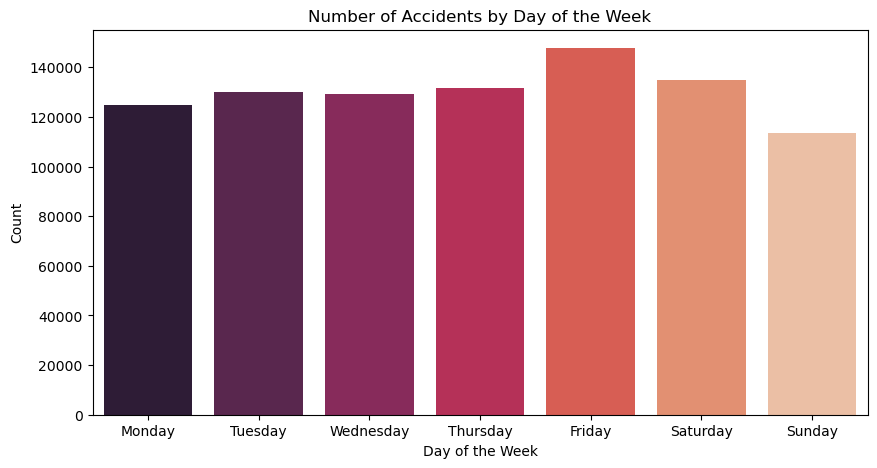

In [20]:
#7
plt.figure(figsize=(10,5))
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')
df['day_of_week'] = df['crash_date'].dt.day_name()
sns.countplot(x=df['day_of_week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='rocket')
plt.title("Number of Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

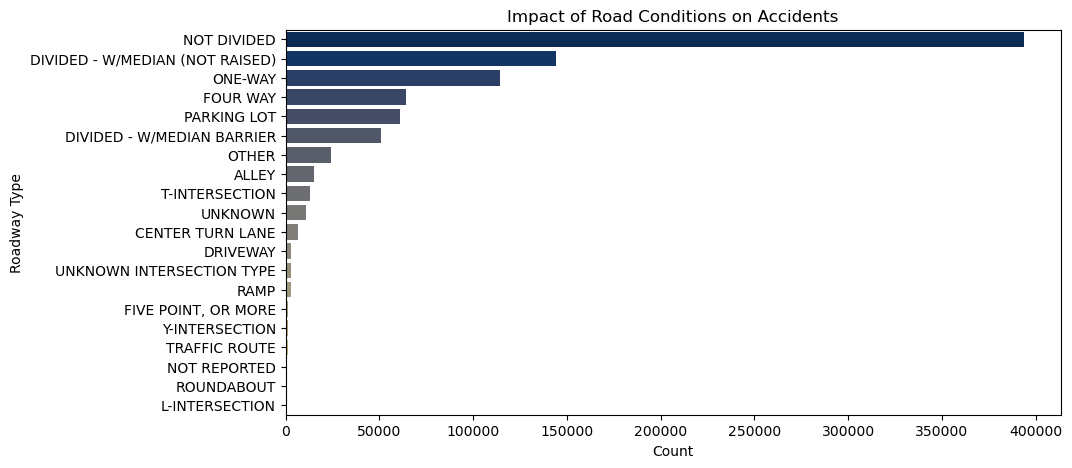

In [21]:
#8
plt.figure(figsize=(10,5))
sns.countplot(y=df['trafficway_type'], order=df['trafficway_type'].value_counts().index, palette='cividis')
plt.title("Impact of Road Conditions on Accidents")
plt.xlabel("Count")
plt.ylabel("Roadway Type")
plt.show()


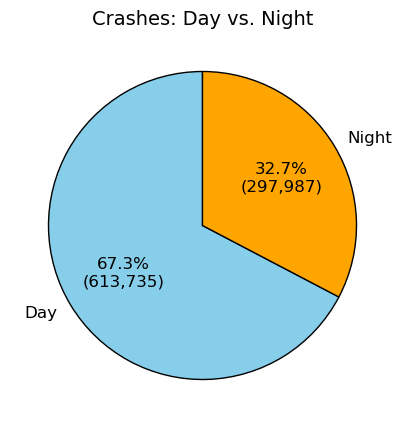

In [24]:
#9
import matplotlib.pyplot as plt

day_night_counts = df['day_night'].value_counts()

plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    day_night_counts, 
    labels=day_night_counts.index, 
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(day_night_counts)/100):,})',  # Show percentage and count
    colors=['skyblue', 'orange'], 
    startangle=90, 
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12}
)
plt.title("Crashes: Day vs. Night", fontsize=14)

plt.show()


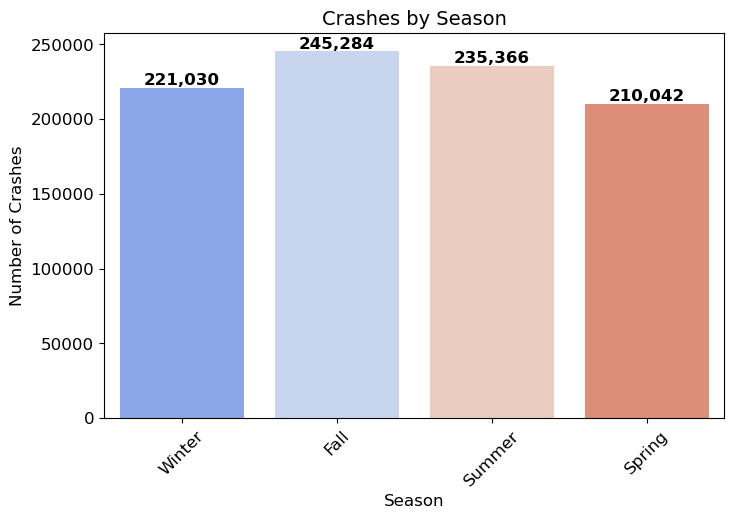

In [27]:
#10
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))


ax = sns.countplot(x=df['crash_season'], palette='coolwarm')


for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')


plt.title("Crashes by Season", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Crashes", fontsize=12)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()



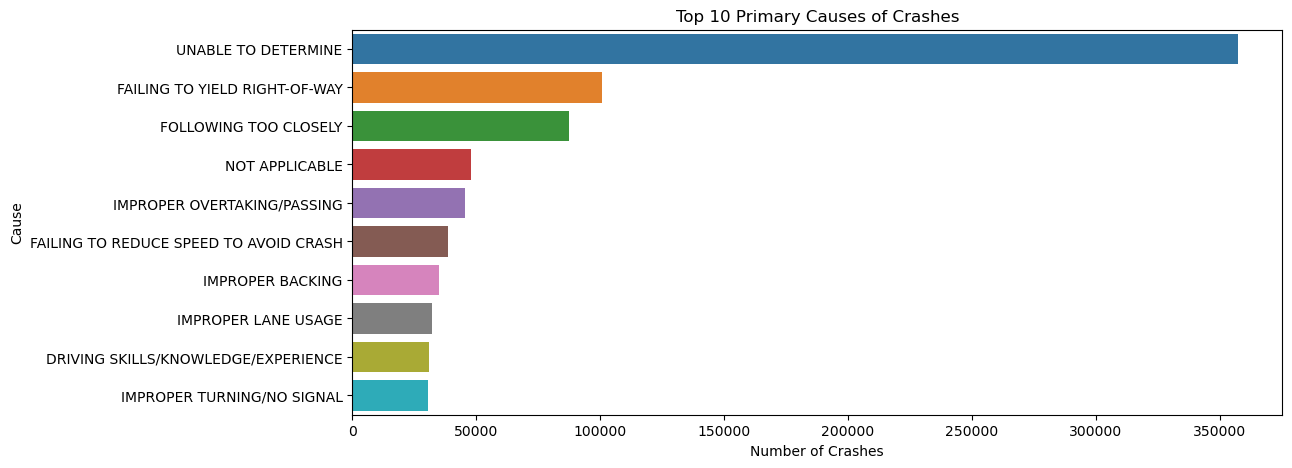

In [28]:
#11
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for top 10 primary contributory causes
plt.figure(figsize=(12,5))
sns.countplot(y=df['prim_contributory_cause'], order=df['prim_contributory_cause'].value_counts().index[:10])
plt.title("Top 10 Primary Causes of Crashes")
plt.xlabel("Number of Crashes")
plt.ylabel("Cause")
plt.show()


C:\Users\91910\AppData\Local\Temp\ipykernel_9420\2456628410.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([format_k(int(label)) for label in plt.gca().get_yticks()])


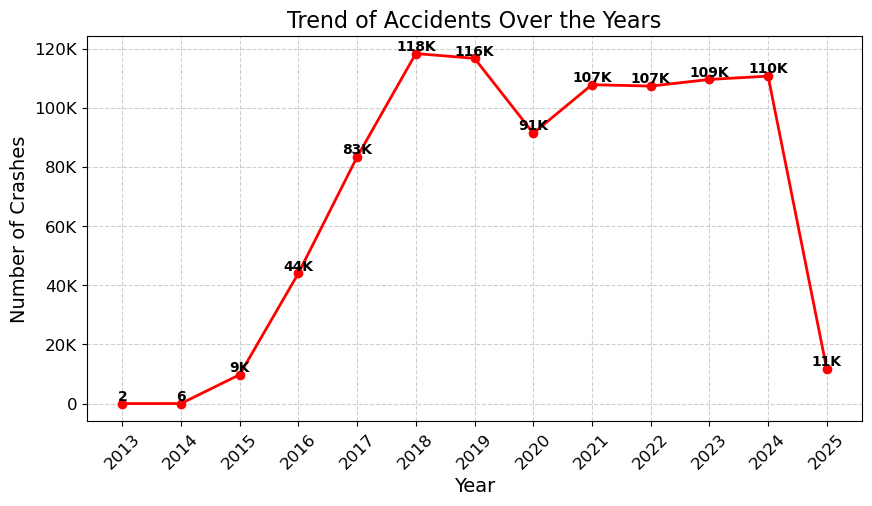

In [34]:
#12
import matplotlib.pyplot as plt


yearly_crashes = df.groupby('crash_year').size()


def format_k(value):
    if value >= 1000:
        return f'{value//1000}K'
    return str(value)


plt.figure(figsize=(10, 5))
plt.plot(yearly_crashes.index, yearly_crashes.values, marker='o', linestyle='-', color='red', linewidth=2, markersize=6)


for x, y in zip(yearly_crashes.index, yearly_crashes.values):
    plt.text(x, y, format_k(y), ha='center', va='bottom', fontsize=10, fontweight='bold')


plt.title("Trend of Accidents Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Crashes", fontsize=14)
plt.xticks(yearly_crashes.index, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_yticklabels([format_k(int(label)) for label in plt.gca().get_yticks()])

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


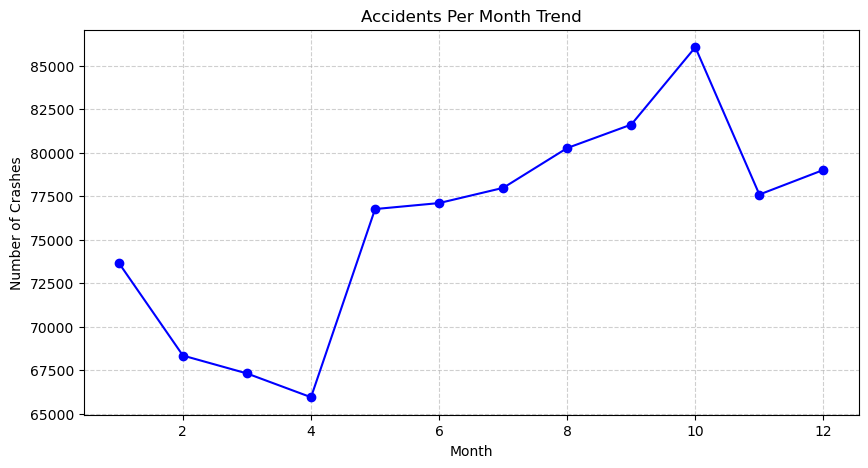

In [36]:
#13
plt.figure(figsize=(10, 5))
df.groupby('crash_month').size().plot(kind='line', marker='o', color='blue')
plt.title("Accidents Per Month Trend")
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


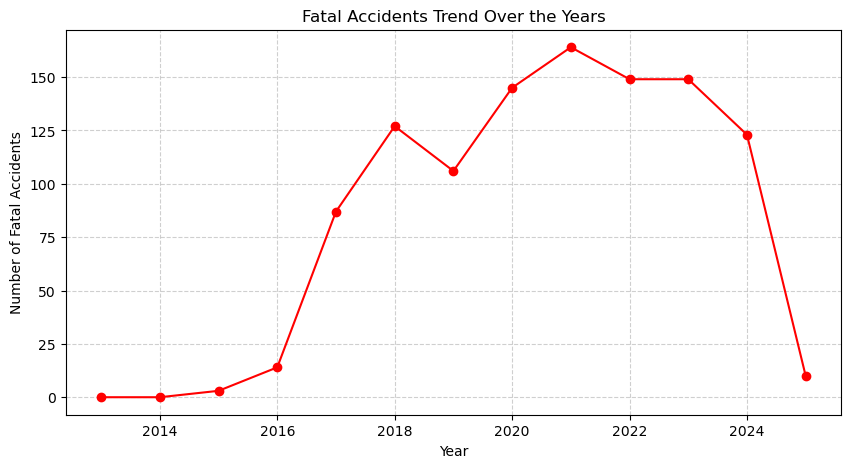

In [38]:
#14
plt.figure(figsize=(10, 5))
df.groupby('crash_year')['injuries_fatal'].sum().plot(kind='line', marker='o', color='red')
plt.title("Fatal Accidents Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Fatal Accidents")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

<Figure size 1200x600 with 0 Axes>

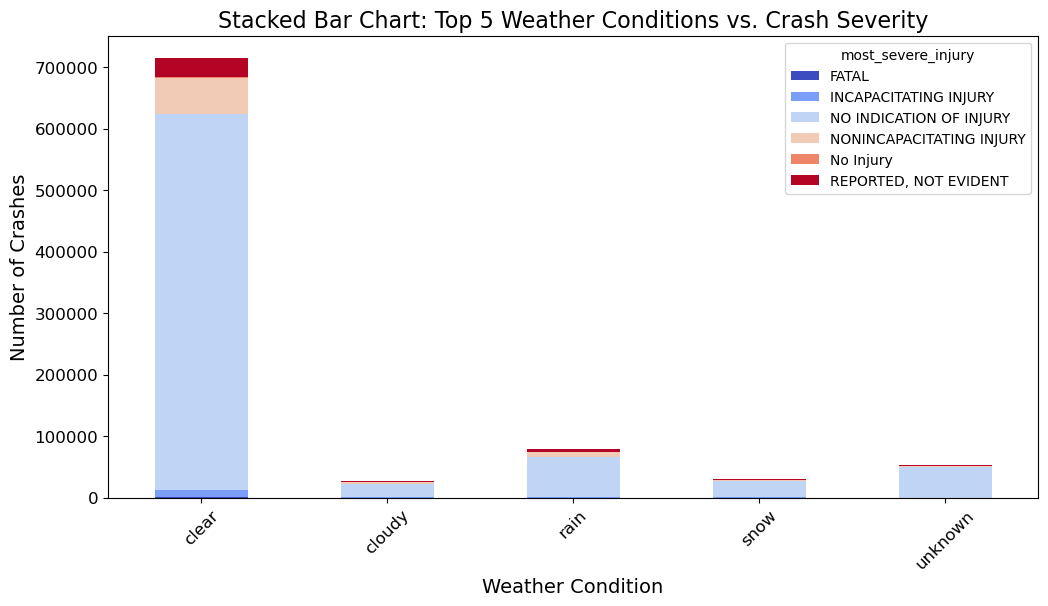

In [41]:
#15
top_5_weather = df['weather_condition'].value_counts().nlargest(5).index
df_top5 = df[df['weather_condition'].isin(top_5_weather)]
plt.figure(figsize=(12, 6))
pd.crosstab(df_top5['weather_condition'], df_top5['most_severe_injury']).plot(
    kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6) 
)


plt.title("Stacked Bar Chart: Top 5 Weather Conditions vs. Crash Severity", fontsize=16)
plt.xlabel("Weather Condition", fontsize=14)
plt.ylabel("Number of Crashes", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


plt.show()


<Figure size 1200x600 with 0 Axes>

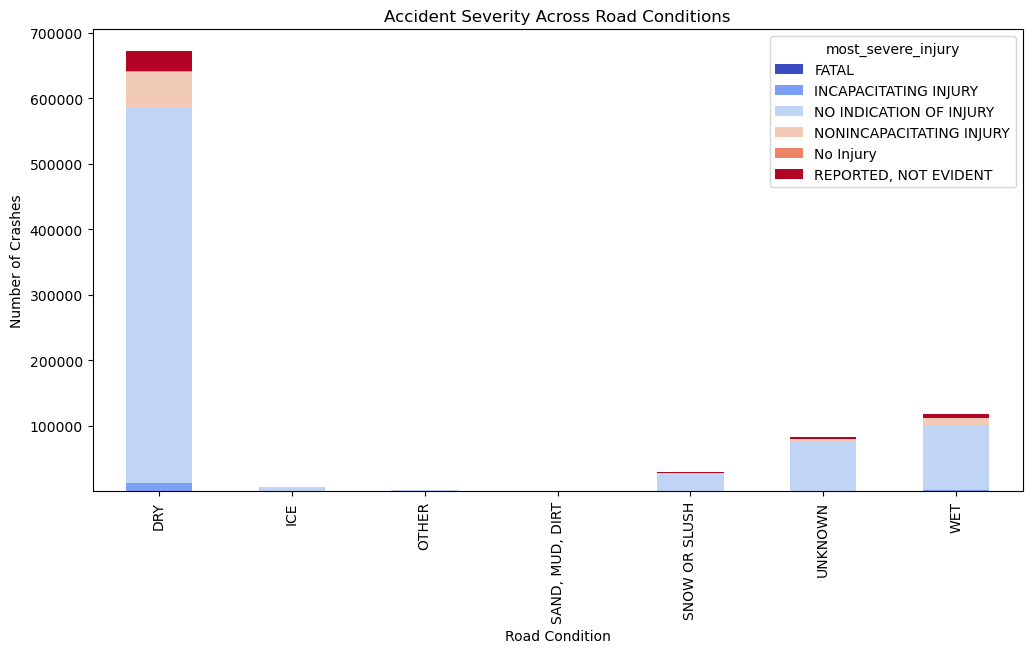

In [42]:
#16
plt.figure(figsize=(12,6))
pd.crosstab(df['roadway_surface_cond'], df['most_severe_injury']).plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,6))
plt.title("Accident Severity Across Road Conditions")
plt.xlabel("Road Condition")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=90)
plt.show()


In [46]:
#17
top_crash_streets = df.groupby(['street_name', 'street_direction']).size().nlargest(10).reset_index(name='Crash Count')
print("Top 10 Crash Streets:")
print(top_crash_streets)

Top 10 Crash Streets:
        street_name street_direction  Crash Count
0       western ave                S        14861
1        pulaski rd                S        14272
2       ashland ave                S        13690
3        halsted st                S        13424
4        cicero ave                S        11635
5        kedzie ave                S        11627
6         north ave                W        10564
7       western ave                N        10259
8    irving park rd                W         9295
9  stony island ave                S         9102


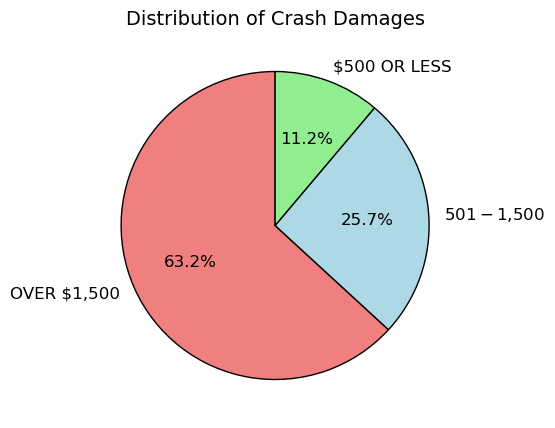

In [50]:
#18
damage_counts = df['damage'].value_counts()
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    damage_counts, 
    labels=damage_counts.index, 
    autopct='%1.1f%%', 
    colors=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'purple'], 
    startangle=90, 
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12}
)
plt.title("Distribution of Crash Damages", fontsize=14)
plt.show()


C:\Users\91910\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


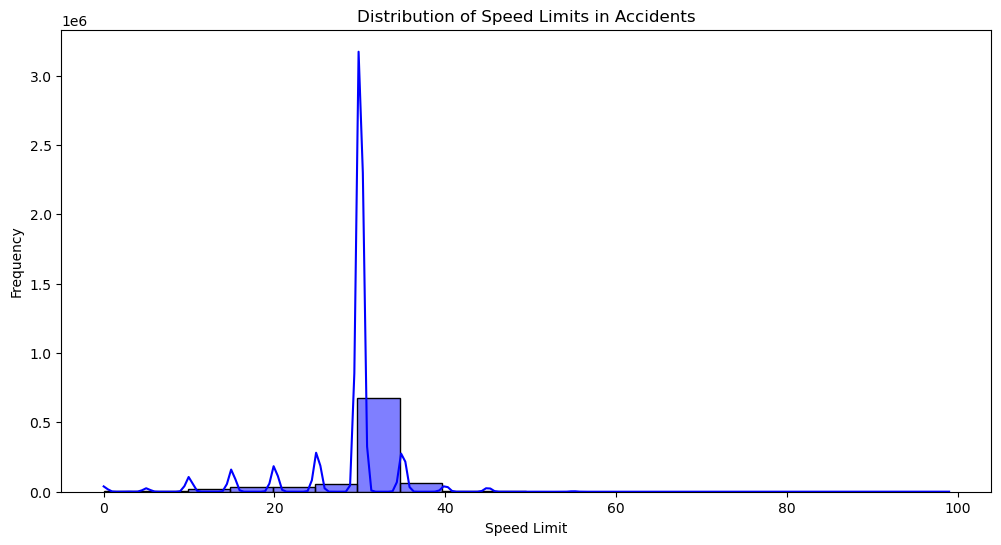

In [52]:
#19
plt.figure(figsize=(12,6))
sns.histplot(df['posted_speed_limit'], bins=20, kde=True, color='blue')
plt.title("Distribution of Speed Limits in Accidents")
plt.xlabel("Speed Limit")
plt.ylabel("Frequency")
plt.show()

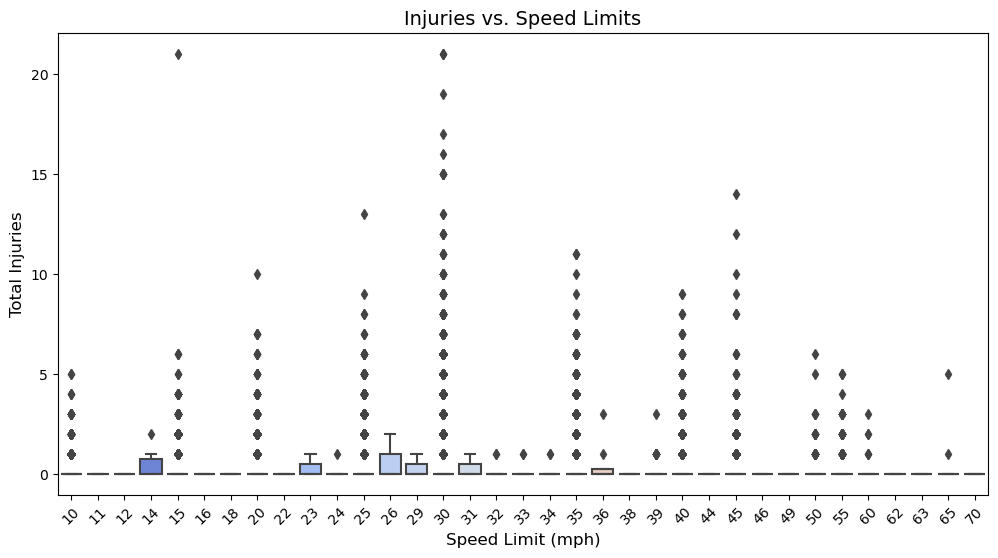

In [63]:
#20
df = df[df['posted_speed_limit'].between(10, 70)]
plt.figure(figsize=(12,6))
sns.boxplot(x=df['posted_speed_limit'], y=df['injuries_total'], palette="coolwarm")
plt.title("Injuries vs. Speed Limits", fontsize=14)
plt.xlabel("Speed Limit (mph)", fontsize=12)
plt.ylabel("Total Injuries", fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\91910\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


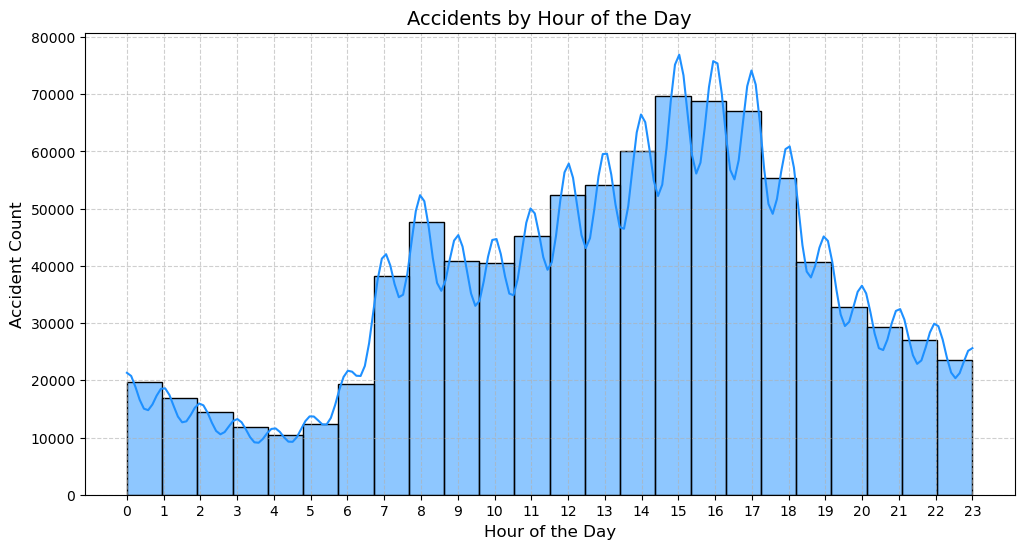

In [64]:
plt.figure(figsize=(12,6))
sns.histplot(df['crash_hour'], bins=24, kde=True, color="dodgerblue")
plt.title("Accidents by Hour of the Day", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Accident Count", fontsize=12)
plt.xticks(range(0,24), fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
